<a href="https://colab.research.google.com/github/Zerzavot/GlobalAIHubDLCourse/blob/main/Missing_Value_Imputation_and_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_boston

data = load_boston()
X = data["data"]
y = data["target"]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

mdl = RandomForestRegressor(n_estimators=30, random_state = 42)
scores = cross_val_score(mdl, X, y, cv = 10)

results = pd.DataFrame([], columns = ["r2 mean", "r2 std"])
results.loc["Original Data"] = [scores.mean(), scores.std()]
results

,r2 mean,r2 std
Original Data,0.485158,0.332248


In [ ]:
np.random.seed(0)

ix = np.random.choice([False, True], size = X.shape, p = [0.9, 0.1])
ix

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
X[ix] = np.nan
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [       nan, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02,        nan, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
               nan],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
X_new = pd.DataFrame(X).dropna()
y_new = y[X_new.index]

scores = cross_val_score(mdl, X_new, y_new, cv = 10)

results.loc["Without NA"] = [scores.mean(), scores.std()]
results


,r2 mean,r2 std
Original Data,0.485158,0.332248
Without NA,0.326314,0.418719


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "mean")
imputer.fit(X)

X_new = imputer.transform(X)
scores = cross_val_score(mdl, X_new, y, cv = 10)

results.loc["Fill with mean"] = [scores.mean(), scores.std()]
results

,r2 mean,r2 std
Original Data,0.485158,0.332248
Without NA,0.326314,0.418719
Fill with mean,0.346685,0.421598


In [ ]:
imputer = SimpleImputer(strategy = "median")
imputer.fit(X)

X_new = imputer.transform(X)
scores = cross_val_score(mdl, X_new, y, cv = 10)

results.loc["Fill with median"] = [scores.mean(), scores.std()]
results

,r2 mean,r2 std
Original Data,0.485158,0.332248
Without NA,0.326314,0.418719
Fill with mean,0.346685,0.421598
Fill with median,0.365172,0.384116


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5) 

imputer.fit(X)

X_new = imputer.transform(X)
scores = cross_val_score(mdl, X_new, y, cv = 10)

results.loc["KNN Imputer"] = [scores.mean(), scores.std()]
results

,r2 mean,r2 std
Original Data,0.485158,0.332248
Without NA,0.326314,0.418719
Fill with mean,0.346685,0.421598
Fill with median,0.365172,0.384116
KNN Imputer,0.384432,0.373090


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(mdl, max_iter = 10)
imputer.fit(X)

X_new = imputer.transform(X)
scores = cross_val_score(mdl, X_new, y, cv = 10)

results.loc["Iterative Imputer"] = [scores.mean(), scores.std()]
results


/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,r2 mean,r2 std
Original Data,0.485158,0.332248
Without NA,0.326314,0.418719
Fill with mean,0.346685,0.421598
Fill with median,0.365172,0.384116
KNN Imputer,0.384432,0.373090
Iterative Imputer,0.441670,0.331567


In [ ]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3)

X_new = pd.DataFrame(X_new)
cluster.fit(X_new)

X_new["cluster_label"] = cluster.predict(X_new)
X_new

In [ ]:
df =  pd.read_csv("sales.csv")
df.head()

In [ ]:
sales = df["sales"]
sales.plot()

In [ ]:
np.random.seed(0)
ix = np.random.choice([False, True], size =  sales.size, p = [0.9,0.1])
sales_new = sales.copy()
sales_new[ix] = np.nan

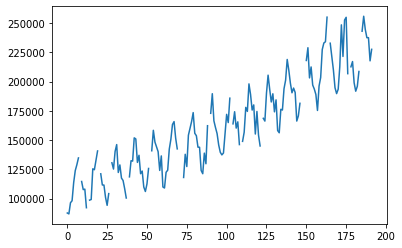

In [ ]:
sales_new.plot()

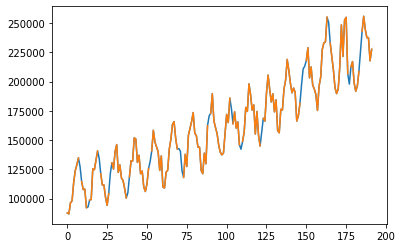

In [ ]:
sales_interpolated = sales_new.interpolate(method="spline", order =  2)
sales_interpolated.plot()
sales_new.plot()

In [ ]:
def ts2td(data, lag = 3):
    X = []
    y = []
    for i in range(len(data)-lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])

    return np.array(X), np.array(y)

In [ ]:
mu = sales[:-12].mean()
sigma =  sales[:-12].std()

sales = (sales - mu)/sigma

In [ ]:
X, y = ts2td(sales.values, lag = 12)
print(X.shape)
print(y.shape) 

(180, 12)
(180,)


In [ ]:
X_train = X[:-12]
y_train = y[:-12]
X_test = X[-12:]
y_test = y[-12:]

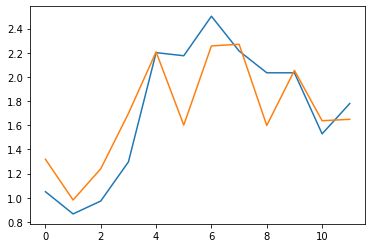

In [ ]:
mdl.fit(X_train, y_train)
ypred = mdl.predict(X_test)

plt.plot(y_test)
plt.plot(ypred)

In [ ]:
def ts2td_multi_step(data, lag = 3, period = 2):
    X = []
    y = []
    for i in range(len(data)-lag-period):
        X.append(data[i:i+lag])
        y.append(data[i+lag:i+lag+period])

    return np.array(X), np.array(y)

X, y = ts2td_multi_step(sales.values, lag = 12, period = 12)
print(X.shape)
print(y.shape) 

(168, 12)
(168, 12)


In [ ]:
sales

0     -1.789741
1     -1.810278
2     -1.566583
3     -1.523441
4     -1.128457
         ...   
187    2.214370
188    2.034175
189    2.034175
190    1.528925
191    1.780122
Name: sales, Length: 192, dtype: float64

In [ ]:
X_train = X[:-1]
y_train = y[:-1]
X_test = X[-1:]
y_test = y[-1:]

In [ ]:
from sklearn.multioutput import MultiOutputRegressor

multi_mdl =  MultiOutputRegressor(mdl)

multi_mdl.fit(X_train, y_train)
ypred = multi_mdl.predict(X_test)

In [ ]:
y_test.shape

(1, 12)

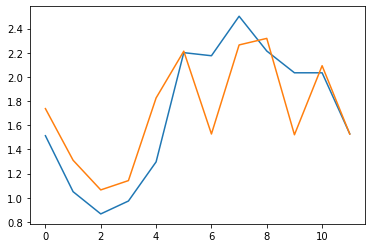

In [ ]:
plt.plot(y_test.ravel())
plt.plot(ypred.ravel())